
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [80]:
# Set your student number and name
student_number = '401106696'
Name = 'Keyhan'
Last_Name = 'Hodaei'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [81]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.linspace(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.1*X**6 - 2*X**3 + 7*X**2 -9*X + 3 + noise
    return X, y

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [82]:
from sklearn.model_selection import train_test_split
dataset = generate_dataset(-3, -1, 1000)
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(dataset[0], dataset[1], test_size=0.4, random_state=42)
X_out_of_range_test, y_out_of_range_test = generate_dataset(4, 6, len(X_in_range_test))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [83]:
class PolynomialRegression() :

    def __init__(self, degree, learning_rate = 0.05, iterations = 500):
        self.degree = degree
        self.learning_rate = learning_rate * 10**-degree
        self.iterations = iterations
        self.weights = np.zeros(self.degree + 1)
        
    def normalize(self, X):
        return (X - np.min(X)) / (np.max(X) - np.min(X))

    def fit(self, X, Y):
        # input : X and Y for fit model with gradient descent and return Self
        x_poly = np.vander(X, self.degree+1, increasing=True)
        for i in range(self.iterations):
            for j in range(len(X)):
                y_pred = np.dot(x_poly[j], self.weights)
                criterion = y_pred - Y[j]
                self.weights = self.weights - self.learning_rate * criterion * x_poly[j]
        return self

    def predict(self, X):
        # Get X and return predicted value from model
        x_poly = np.vander(X, self.degree+1, increasing=True)
        return np.dot(x_poly, self.weights)

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [84]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = []
    for model in models:
        y_pred = model.predict(X_test)
        losses.append(mean_squared_error(y_test, y_pred))
    return losses

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

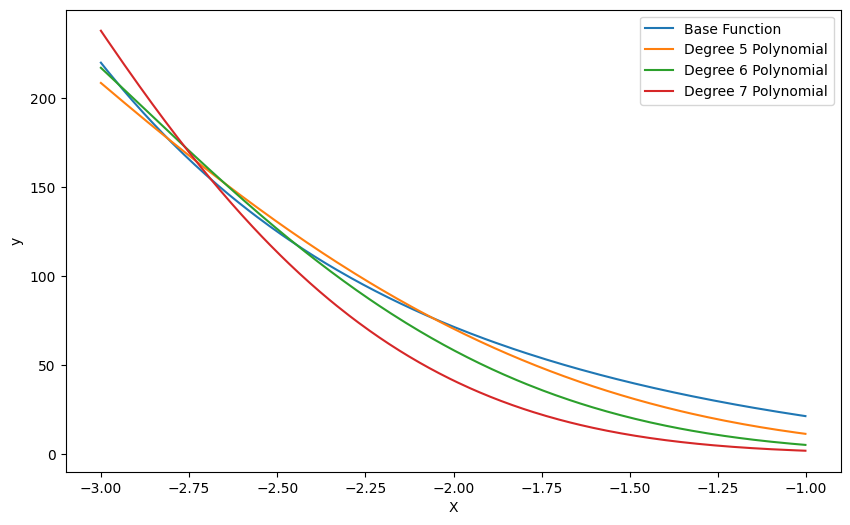

In [85]:
import matplotlib.pyplot as plt

def plot_polynomial(X_train, y_train, X_test, degree):
    i = np.argsort(X_test)
    model = PolynomialRegression(degree)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(X_test[i], y_pred[i], label=f'Degree {degree} Polynomial')

plt.figure(figsize=(10, 6))
plt.plot(
    X_in_range_test[np.argsort(X_in_range_test)],
    (0.1 * X_in_range_test ** 6 - 2 * X_in_range_test ** 3 + 7 * X_in_range_test ** 2 - 9 * X_in_range_test + 3)[np.argsort(X_in_range_test)],
    label='Base Function'
)
for degree in [5, 6, 7]:
    plot_polynomial(X_train, y_train, X_in_range_test, degree)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

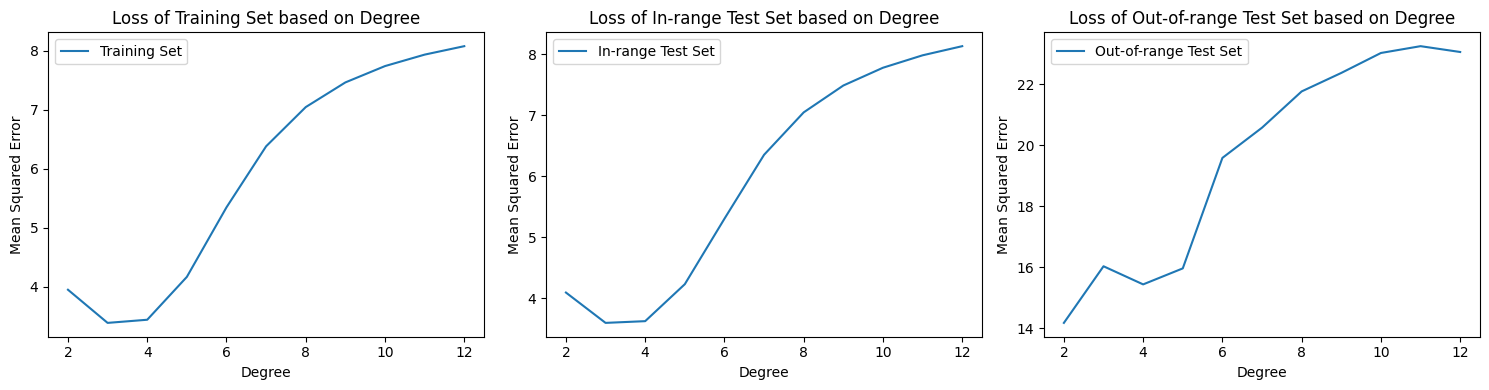

In [86]:
models = [PolynomialRegression(degree).fit(X_train, y_train) for degree in range(2, 13)]
train_losses = evaluate_models(models, X_train, y_train)
in_range_test_losses = evaluate_models(models, X_in_range_test, y_in_range_test)
out_of_range_test_losses = evaluate_models(models, X_out_of_range_test, y_out_of_range_test)

fig = plt.figure(figsize=(15, 4))
fig.add_subplot(131).plot(range(2, 13), np.log(train_losses), label='Training Set')
fig.add_subplot(132).plot(range(2, 13), np.log(in_range_test_losses), label='In-range Test Set')
fig.add_subplot(133).plot(range(2, 13), np.log(out_of_range_test_losses), label='Out-of-range Test Set')

for i in range(3):
    fig.get_axes()[i].set_xlabel('Degree')
    fig.get_axes()[i].set_ylabel('Mean Squared Error')
    str = ['Training Set', 'In-range Test Set', 'Out-of-range Test Set'][i]
    fig.get_axes()[i].set_title(f'Loss of {str} based on Degree')
    fig.get_axes()[i].legend()
plt.tight_layout()

plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

In the lower degrees, the model has high bias and low variance, which means that the model is not complex enough to capture the underlying patterns in the data. As the degree increases, the model becomes more complex and the bias decreases, but the variance increases. This is because the model starts to overfit the training data and captures the noise in the data. In the higher degrees, the model has low bias and high variance, which means that the model is too complex and does not generalize well to unseen data. As you can see the loss of out-of-range test set is highly increased in higher degrees, which is a sign that the model is overfitting the training data. A solution to this problem could be using more data to train the model.